In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os #shutil
import os.path
import pathlib
from pathlib import Path
from glob import glob
from sklearn.linear_model import LogisticRegression
import pathlib
import seaborn as sns
import PIL
import PIL.Image
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer, Dropout 

In [2]:
test_dir = pathlib.Path('test')
train_dir = pathlib.Path('train')
val_dir = pathlib.Path('val')


In [5]:
all_data_dir=pathlib.Path('all_data')
test_dir = pathlib.Path('test-1')

In [6]:
image_count = len(list(test_dir.glob('**/*.jpg')))
print(image_count)

2400


In [7]:
image_count = len(list(val_dir.glob('**/*.jpg')))
print(image_count)

2800


In [8]:
train_holding_phone = pathlib.Path('train/holding_phone')
holding_phone_list=list(train_holding_phone.glob('**/*.jpg'))
image_count = len(holding_phone_list)
print(image_count)

8256


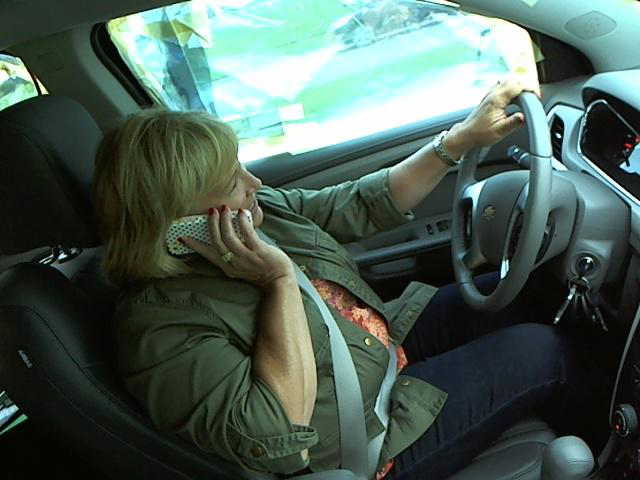

In [9]:
PIL.Image.open(str(holding_phone_list[0]))

In [10]:
train_distracted = pathlib.Path('train/distracted')
distracted_list=list(train_distracted.glob('**/*.jpg'))
image_count = len(distracted_list)
print(image_count)

9179


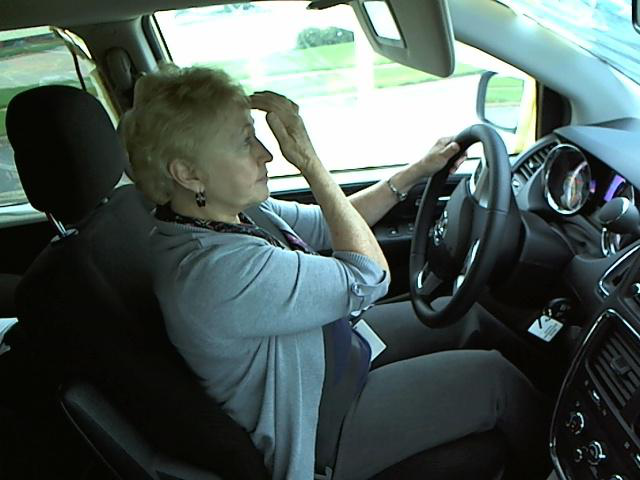

In [11]:

PIL.Image.open(str(distracted_list[0]))

In [12]:
train_safe = pathlib.Path('train/safe')
safe_list=list(train_safe.glob('**/*.jpg'))
image_count = len(safe_list)
print(image_count)

2189


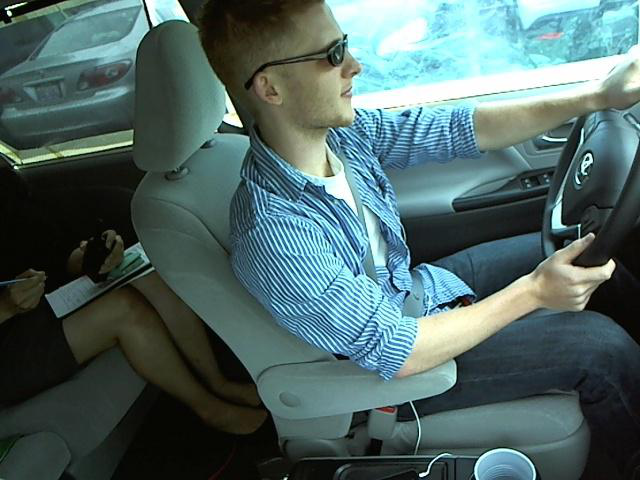

In [13]:
PIL.Image.open(str(safe_list[0]))

C:\Users\afnan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

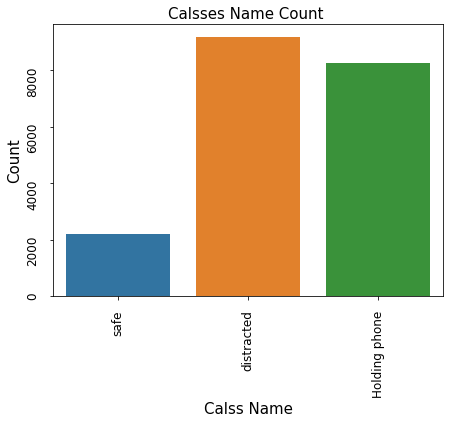

In [14]:
plt.subplots(figsize=(7,5))
height = [len(safe_list), len(distracted_list), len(holding_phone_list)]
bars = ['safe', 'distracted', 'Holding phone']
x_pos = np.arange(len(bars))

bar1_plot=sns.barplot(bars,height)
bar1_plot.tick_params(pad=10,labelsize=12,rotation=90)
bar1_plot.set_xlabel('Calss Name',size=15)
bar1_plot.set_ylabel('Count',size=15)
bar1_plot.set_title('Calsses Name Count ',size=15)
;

In [15]:
image_gen = ImageDataGenerator(rescale=1./255)#Generate batches of tensor image data with real-time data augmentation.


In [16]:
batch_size = 32  
img_height = 150  # 150  
img_width = 150   # 150   

In [17]:
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(img_height, img_width),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='categorical')

Found 19624 images belonging to 3 classes.


In [31]:
train_generator

In [18]:
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(img_height, img_width),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')

Found 2800 images belonging to 3 classes.


In [52]:
TRAIN_genrator= image_gen.flow_from_directory(all_data_dir,
                                          target_size=(img_height, img_width),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='categorical')

Found 22424 images belonging to 3 classes.


In [57]:
TRAIN_genrator.labels

array([0, 0, 0, ..., 2, 2, 2])

In [53]:
test_generator = image_gen.flow_from_directory(test_dir,
                                               target_size=(img_height, img_width),
                                               batch_size=batch_size,
                                               seed=42,
                                               shuffle=False,
                                               class_mode='categorical')

Found 2400 images belonging to 3 classes.


In [16]:
train_generator.class_indices

{'distracted': 0, 'holding_phone': 1, 'safe': 2}

In [17]:
class_dict=train_generator.class_indices
labels= train_generator.labels
file_names= train_generator.filenames 

In [18]:
class_dict

{'distracted': 0, 'holding_phone': 1, 'safe': 2}

In [19]:
labels

array([0, 0, 0, ..., 2, 2, 2])

In [20]:
file_names

['distracted\\img_ (1).jpg',
 'distracted\\img_ (10).jpg',
 'distracted\\img_ (100).jpg',
 'distracted\\img_ (1000).jpg',
 'distracted\\img_ (1001).jpg',
 'distracted\\img_ (1002).jpg',
 'distracted\\img_ (1003).jpg',
 'distracted\\img_ (1004).jpg',
 'distracted\\img_ (1005).jpg',
 'distracted\\img_ (1006).jpg',
 'distracted\\img_ (1007).jpg',
 'distracted\\img_ (1008).jpg',
 'distracted\\img_ (1009).jpg',
 'distracted\\img_ (101).jpg',
 'distracted\\img_ (1010).jpg',
 'distracted\\img_ (1011).jpg',
 'distracted\\img_ (1012).jpg',
 'distracted\\img_ (1013).jpg',
 'distracted\\img_ (1014).jpg',
 'distracted\\img_ (1015).jpg',
 'distracted\\img_ (1016).jpg',
 'distracted\\img_ (1017).jpg',
 'distracted\\img_ (1018).jpg',
 'distracted\\img_ (1019).jpg',
 'distracted\\img_ (102).jpg',
 'distracted\\img_ (1020).jpg',
 'distracted\\img_ (1021).jpg',
 'distracted\\img_ (1022).jpg',
 'distracted\\img_ (1023).jpg',
 'distracted\\img_ (1024).jpg',
 'distracted\\img_ (1025).jpg',
 'distracted\\im

In [138]:
## preparing training Data
x=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(x.shape)
print(y.shape)

(19624, 150, 150, 3)
(19624, 3)


In [139]:
X_train=x.reshape(19624, 150* 150* 3)

In [140]:
X_train

array([[0.1137255 , 0.15686275, 0.09019608, ..., 0.03921569, 0.03529412,
        0.02745098],
       [0.18039216, 0.21960786, 0.1764706 , ..., 0.0509804 , 0.0509804 ,
        0.0509804 ],
       [0.06666667, 0.07450981, 0.05490196, ..., 0.08235294, 0.06666667,
        0.07058824],
       ...,
       [0.04313726, 0.07058824, 0.04313726, ..., 0.03529412, 0.03137255,
        0.01568628],
       [0.13333334, 0.18431373, 0.14901961, ..., 0.04705883, 0.03137255,
        0.01960784],
       [0.0627451 , 0.0627451 , 0.05490196, ..., 0.04313726, 0.02745098,
        0.02352941]], dtype=float32)

In [141]:
new_xtrain=np.argmax(to_categorical(X_train),axis=1)

In [142]:
new_xtrain

array([[  0, 190],
       [  0, 145],
       [  0, 180],
       ...,
       [  0, 145],
       [  0, 162],
       [  0, 210]], dtype=int64)

In [143]:
new_x_train=new_xtrain.flatten()

In [144]:
new_x_train

array([  0, 190,   0, ..., 162,   0, 210], dtype=int64)

In [145]:
X_Traain=new_x_train.reshape(-1, 1)

In [146]:
new_y=np.argmax(to_categorical(y),axis=1)

In [147]:
new_y_train=new_y.flatten()
# transform to one dimention array

In [148]:
new_y_train

array([1, 0, 1, ..., 2, 0, 2], dtype=int64)

In [149]:
Y_Traain=new_y_train.reshape(-1, 1)

In [150]:
## preparing validation data 
x_val=np.concatenate([val_generator.next()[0] for i in range(val_generator.__len__())])
y_val=np.concatenate([val_generator.next()[1] for i in range(val_generator.__len__())])
print(x_val.shape)
print(y_val.shape)

(2800, 150, 150, 3)
(2800, 3)


In [151]:
X_val=x_val.reshape(2800, 150* 150* 3)

In [152]:
new_X_val=np.argmax(to_categorical(X_val),axis=1)

In [153]:
new_Xval=new_X_val.flatten()

In [154]:
X_vaali=new_Xval.reshape(-1, 1)

In [155]:
new_y_val=np.argmax(to_categorical(y_val),axis=1)

In [156]:
new_yval=new_y_val.flatten()

In [157]:
Y_vaali=new_yval.reshape(-1, 1)

# Baseline Model

In [158]:

from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, accuracy_score, classification_report, roc_auc_score, roc_curve
def getScores(model_,X_train_, y_train_, X_val_, y_val_, y_pred_):
    
    print("Training Score ",model_.score(X_train_, y_train_))
    print("Validation Score ",model_.score(X_val_, y_val_))
    

In [159]:
from sklearn.linear_model import LogisticRegressionCV

In [161]:
logr= LogisticRegression(C=100,max_iter=3000)
logr.fit(X_Traain,Y_Traain)


C:\Users\afnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=100, max_iter=3000)

In [162]:
pred_logr = logr.predict(X_vaali)

In [163]:
getScores(logr,X_Traain, Y_Traain, X_vaali, Y_vaali, pred_logr)


Training Score  0.4990827558092132
Validation Score  0.5001785714285715


In [165]:
# fit model on training data
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=True)
xgb.fit(X_Traain,Y_Traain)

C:\Users\afnan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\afnan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [166]:
pred_xgb = xgb.predict(X_vaali)

In [167]:
getScores(xgb,X_Traain, Y_Traain, X_vaali, Y_vaali, pred_xgb)

Training Score  0.5250458622095393
Validation Score  0.48446428571428574


## Base model 2 -NN

NN with 1 hidden layer

In [22]:
base_model = Sequential()

base_model.add(InputLayer(input_shape=(150,150,3)))

base_model.add(Dense(32,activation='relu'))   

base_model.add(Flatten())
base_model.add(Dense(3 , activation = 'softmax'))  # 

base_model.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])  

In [23]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150, 150, 32)      128       
                                                                 
 flatten (Flatten)           (None, 720000)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 2160003   
                                                                 
Total params: 2,160,131
Trainable params: 2,160,131
Non-trainable params: 0
_________________________________________________________________


In [26]:
history_base=base_model.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10, batch_size=32)

Epoch 1/10
614/614 [==============================] - 158s 258ms/step - loss: 7.6322e-04 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9971
Epoch 2/10
614/614 [==============================] - 172s 281ms/step - loss: 5.5488e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 0.9993
Epoch 3/10
614/614 [==============================] - 168s 273ms/step - loss: 3.6506e-04 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9986
Epoch 4/10
614/614 [==============================] - 163s 265ms/step - loss: 2.5021e-04 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9986
Epoch 5/10
614/614 [==============================] - 167s 273ms/step - loss: 0.1256 - accuracy: 0.9767 - val_loss: 0.0168 - val_accuracy: 0.9946
Epoch 6/10
614/614 [==============================] - 170s 277ms/step - loss: 0.0041 - accuracy: 0.9998 - val_loss: 0.0086 - val_accuracy: 0.9979
Epoch 7/10
614/614 [==============================] - 175s 286ms/step - loss: 0.0016 - accuracy: 1.0000 - va

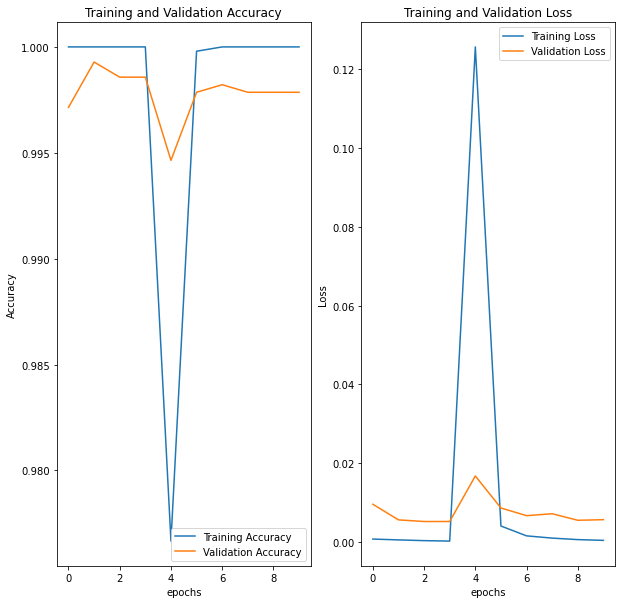

In [29]:
acc = history_base.history['accuracy']
val_acc = history_base.history['val_accuracy']

loss = history_base.history['loss']
val_loss = history_base.history['val_loss']
epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(50, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

plt.show()

#### NN with 6 hidden layer

In [37]:
base_model_2 = Sequential()
#6 hidden layer
base_model_2.add(InputLayer(input_shape=(150,150,3)))

base_model_2.add(Dense(32,activation='relu'))   

base_model_2.add(Dense(32,activation='relu')) 

base_model_2.add(Dense(32,activation='relu')) 

base_model_2.add(Dense(32,activation='relu'))   


base_model_2.add(Flatten())
base_model_2.add(Dense(32,activation='relu'))   
base_model_2.add(Dense(32,activation='relu'))   

base_model_2.add(Dense(3 , activation = 'softmax'))  

base_model_2.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])

In [38]:
base_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 150, 150, 32)      128       
                                                                 
 dense_3 (Dense)             (None, 150, 150, 32)      1056      
                                                                 
 dense_4 (Dense)             (None, 150, 150, 32)      1056      
                                                                 
 dense_5 (Dense)             (None, 150, 150, 32)      1056      
                                                                 
 flatten_1 (Flatten)         (None, 720000)            0         
                                                                 
 dense_6 (Dense)             (None, 32)                23040032  
                                                                 
 dense_7 (Dense)             (None, 32)               

In [39]:
history_base_2=base_model_2.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10, batch_size=32)

Epoch 1/10
614/614 [==============================] - 388s 631ms/step - loss: 1.7882 - accuracy: 0.5799 - val_loss: 0.5529 - val_accuracy: 0.8014
Epoch 2/10
614/614 [==============================] - 392s 638ms/step - loss: 0.4091 - accuracy: 0.8430 - val_loss: 0.1287 - val_accuracy: 0.9621
Epoch 3/10
614/614 [==============================] - 391s 637ms/step - loss: 0.0511 - accuracy: 0.9848 - val_loss: 0.0351 - val_accuracy: 0.9907
Epoch 4/10
614/614 [==============================] - 389s 633ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.0148 - val_accuracy: 0.9954
Epoch 5/10
614/614 [==============================] - 372s 606ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0084 - val_accuracy: 0.9979
Epoch 6/10
614/614 [==============================] - 374s 609ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0053 - val_accuracy: 0.9989
Epoch 7/10
614/614 [==============================] - 374s 609ms/step - loss: 1.4814e-04 - accuracy: 1.0000 - val_loss: 0.00

In [40]:
images_train = [cv2.imread(file) for file in glob("**/train\**.jpg")]

print(type(images_train))
images_train = np.array(images_train)
print(type(images_train))


<class 'list'>
<class 'numpy.ndarray'>


## CNN Models :

#### Models-0
using MaxPooling2D, activation function is relu and with no padding

In [82]:
num_classes = 3

model_0 = Sequential()

model_0.add(InputLayer(input_shape=(150,150,3)))

model_0.add(Conv2D(32, 3, activation='relu'))  
model_0.add(MaxPooling2D())

model_0.add(Conv2D(32, 3, activation='relu'))   # 64
model_0.add(MaxPooling2D())

model_0.add(Conv2D(32, 3, activation='relu'))   
model_0.add(MaxPooling2D())

model_0.add(Flatten())
model_0.add(Dense(32, activation='relu'))
model_0.add(Dense(num_classes , activation = 'softmax'))   

model_0.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy']) 

In [83]:

model_0.summary()

Model: "sequential_312"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 32)    

epochs 10: - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0180 - val_accuracy: 0.9957

In [86]:
#from ann_visualizer.visualize import ann_viz
#ann_viz(model_0)


In [87]:
## محاوله ترجيع البيانات القديمه
from keras.models import load_model
saved_model = load_model("first.h5")

In [88]:
history_0 = saved_model.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10
)   

Epoch 1/10
614/614 [==============================] - 256s 415ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0207 - val_accuracy: 0.9943
Epoch 2/10
614/614 [==============================] - 248s 404ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0177 - val_accuracy: 0.9954
Epoch 3/10
614/614 [==============================] - 246s 401ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0173 - val_accuracy: 0.9954
Epoch 4/10
614/614 [==============================] - 247s 403ms/step - loss: 1.1470e-04 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9971
Epoch 5/10
614/614 [==============================] - 249s 405ms/step - loss: 3.2491e-05 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9968
Epoch 6/10
614/614 [==============================] - 248s 403ms/step - loss: 2.0416e-05 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9968
Epoch 7/10
614/614 [==============================] - 247s 403ms/step - loss: 1.3976e-05 - accuracy: 1.0000 - va

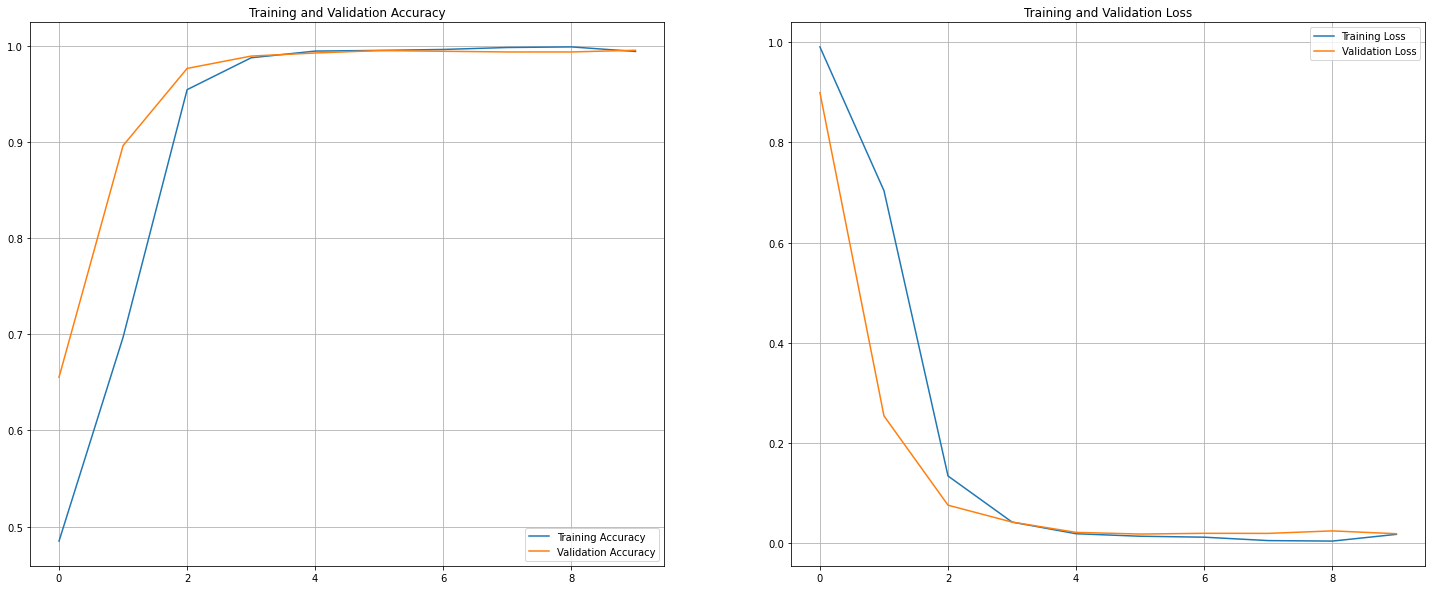

In [191]:
acc = history_0.history['accuracy']
val_acc = history_0.history['val_accuracy']

loss = history_0.history['loss']
val_loss = history_0.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

In [192]:
model_0.save('first.h5')

# CNN-Model-1

### using MaxPooling2D, activation function is relu and with no padding

In [169]:

model_p = Sequential()

#MaxPooling2D, activation='relu', no padding
model_p.add(InputLayer(input_shape=(150,150,3)))

model_p.add(Conv2D(320, 3, activation='relu'))   #320 
model_p.add(MaxPooling2D())

model_p.add(Conv2D(128, 3, activation='relu'))   # 64
model_p.add(MaxPooling2D())

model_p.add(Conv2D(64, 3, activation='relu'))   # 128
model_p.add(MaxPooling2D())

model_p.add(Flatten())
model_p.add(Dense(32, activation='relu'))
model_p.add(Dense(3 , activation = 'softmax'))  # 

model_p.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])  
model_p.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 320)     8960      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 320)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       368768    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [170]:
history_p = model_p.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10
)       

Epoch 1/10
614/614 [==============================] - 2428s 4s/step - loss: 1.0398 - accuracy: 0.4494 - val_loss: 0.9535 - val_accuracy: 0.5357
Epoch 2/10
614/614 [==============================] - 2413s 4s/step - loss: 0.9984 - accuracy: 0.4833 - val_loss: 0.9817 - val_accuracy: 0.5357
Epoch 3/10
614/614 [==============================] - 2393s 4s/step - loss: 0.9769 - accuracy: 0.4628 - val_loss: 0.9533 - val_accuracy: 0.5357
Epoch 4/10
614/614 [==============================] - 4382s 7s/step - loss: 0.9787 - accuracy: 0.4580 - val_loss: 0.9495 - val_accuracy: 0.5357
Epoch 5/10
614/614 [==============================] - 23288s 38s/step - loss: 0.9820 - accuracy: 0.4539 - val_loss: 0.9572 - val_accuracy: 0.5357
Epoch 6/10
614/614 [==============================] - 2392s 4s/step - loss: 1.0012 - accuracy: 0.4626 - val_loss: 0.9815 - val_accuracy: 0.5357
Epoch 7/10
614/614 [==============================] - 2716s 4s/step - loss: 0.9247 - accuracy: 0.5495 - val_loss: 0.6159 - val_accurac

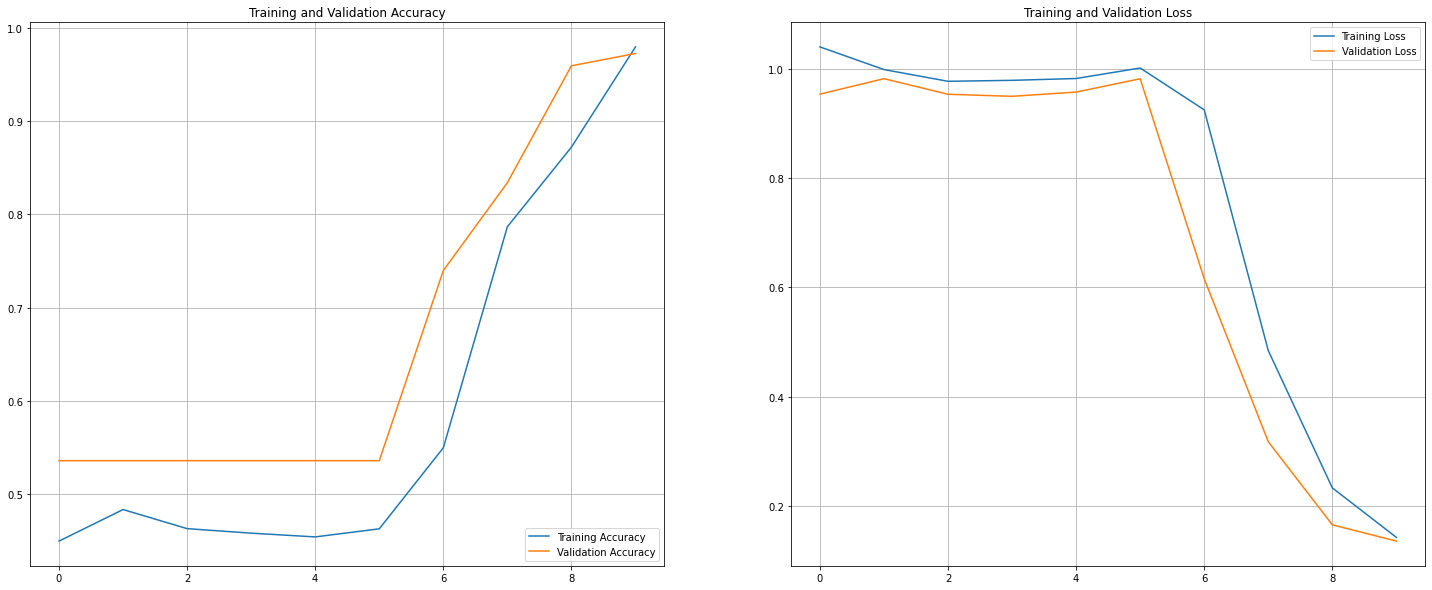

In [179]:
acc = history_p.history['accuracy']
val_acc = history_p.history['val_accuracy']

loss = history_p.history['loss']
val_loss = history_p.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

In [175]:


model_p.save('model_p.h5')


# CNN-Model-2

##### MaxPooling2D, activation function is tanh and  padding is same

In [193]:
model_1 = Sequential()

#MaxPooling2D, activation='tanh', padding='same'
model_1.add(InputLayer(input_shape=(150,150,3)))

model_1.add(Conv2D(32, 3, activation='tanh', padding='same'))   # or put ,input_shape=(180,180,3) in the first layer is fine too
model_1.add(MaxPooling2D())

model_1.add(Conv2D(32, 3, activation='tanh', padding='same'))   # 64
model_1.add(MaxPooling2D())

model_1.add(Conv2D(32, 3, activation='tanh', padding='same'))   # 128
model_1.add(MaxPooling2D())

model_1.add(Flatten())
model_1.add(Dense(128, activation='tanh'))
model_1.add(Dense(3 , activation = 'softmax'))  # 

model_1.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])
model_1.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 18, 18, 32)      

In [194]:
history_1 = model_1.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10
)  

Epoch 1/10
614/614 [==============================] - 309s 502ms/step - loss: 1.3175 - accuracy: 0.4794 - val_loss: 1.1287 - val_accuracy: 0.3571
Epoch 2/10
614/614 [==============================] - 304s 494ms/step - loss: 1.0055 - accuracy: 0.4631 - val_loss: 0.9562 - val_accuracy: 0.5357
Epoch 3/10
614/614 [==============================] - 298s 485ms/step - loss: 1.0123 - accuracy: 0.4400 - val_loss: 0.9525 - val_accuracy: 0.5357
Epoch 4/10
614/614 [==============================] - 302s 492ms/step - loss: 1.0097 - accuracy: 0.4349 - val_loss: 0.9419 - val_accuracy: 0.5357
Epoch 5/10
614/614 [==============================] - 301s 491ms/step - loss: 1.0135 - accuracy: 0.4414 - val_loss: 0.9618 - val_accuracy: 0.5357
Epoch 6/10
614/614 [==============================] - 302s 491ms/step - loss: 1.0028 - accuracy: 0.4531 - val_loss: 1.1843 - val_accuracy: 0.3571
Epoch 7/10
614/614 [==============================] - 300s 489ms/step - loss: 1.0346 - accuracy: 0.4197 - val_loss: 0.9478 -

In [199]:
model_1.save('model_1.h5')

In [ ]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

# CNN-Model-3

#### MaxPooling2D, activation='relu', padding='same'

In [195]:
model_2 = Sequential()

#MaxPooling2D, activation='relu', padding='same'
model_2.add(InputLayer(input_shape=(150,150,3)))

model_2.add(Conv2D(32, 3, activation='relu', padding='same'))   # or put ,input_shape=(180,180,3) in the first layer is fine too
model_2.add(MaxPooling2D())

model_2.add(Conv2D(32, 3, activation='relu', padding='same'))   # 64
model_2.add(MaxPooling2D())

model_2.add(Conv2D(32, 3, activation='relu', padding='same'))   # 128
model_2.add(MaxPooling2D())

model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(3 , activation = 'softmax'))  # 

model_2.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])
model_2.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 18, 18, 32)      

In [196]:

history_2 = model_2.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10
)  

Epoch 1/10
614/614 [==============================] - 272s 442ms/step - loss: 1.0262 - accuracy: 0.4578 - val_loss: 1.0711 - val_accuracy: 0.3625
Epoch 2/10
614/614 [==============================] - 274s 447ms/step - loss: 0.7075 - accuracy: 0.6772 - val_loss: 0.1967 - val_accuracy: 0.9354
Epoch 3/10
614/614 [==============================] - 279s 454ms/step - loss: 0.1121 - accuracy: 0.9640 - val_loss: 0.0356 - val_accuracy: 0.9889
Epoch 4/10
614/614 [==============================] - 284s 463ms/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0352 - val_accuracy: 0.9879
Epoch 5/10
614/614 [==============================] - 285s 464ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0143 - val_accuracy: 0.9946
Epoch 6/10
614/614 [==============================] - 286s 466ms/step - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.0632 - val_accuracy: 0.9764
Epoch 7/10
614/614 [==============================] - 284s 462ms/step - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0125 -

In [ ]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

In [203]:
model_2.save('model_2.h5')

# CNN model-4

#### MaxPooling2D, activation='relu', padding='valid'

In [197]:
#MaxPooling2D, activation='relu', padding='valid'

model_3 = Sequential()

model_3.add(InputLayer(input_shape=(150,150,3)))

model_3.add(Conv2D(32, 3, activation='relu', padding='valid'))   # or put ,input_shape=(180,180,3) in the first layer is fine too
model_3.add(MaxPooling2D())

model_3.add(Conv2D(32, 3, activation='relu', padding='valid'))   # 64
model_3.add(MaxPooling2D())

model_3.add(Conv2D(32, 3, activation='relu', padding='valid'))   # 128
model_3.add(MaxPooling2D())

model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(3 , activation = 'softmax'))  # 

model_3.compile(optimizer='adam', 
                loss="categorical_crossentropy", 
                metrics=['accuracy'])
model_3.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 32)      

In [198]:
history_3 = model_3.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10
)  

Epoch 1/10
614/614 [==============================] - 252s 410ms/step - loss: 1.0416 - accuracy: 0.4546 - val_loss: 0.9447 - val_accuracy: 0.5357
Epoch 2/10
614/614 [==============================] - 280s 457ms/step - loss: 1.0131 - accuracy: 0.4238 - val_loss: 0.9467 - val_accuracy: 0.5357
Epoch 3/10
614/614 [==============================] - 282s 459ms/step - loss: 0.9194 - accuracy: 0.5350 - val_loss: 0.9469 - val_accuracy: 0.6664
Epoch 4/10
614/614 [==============================] - 271s 442ms/step - loss: 0.6127 - accuracy: 0.7342 - val_loss: 0.5106 - val_accuracy: 0.7604
Epoch 5/10
614/614 [==============================] - 265s 432ms/step - loss: 0.3266 - accuracy: 0.8446 - val_loss: 0.2177 - val_accuracy: 0.9496
Epoch 6/10
614/614 [==============================] - 266s 433ms/step - loss: 0.2062 - accuracy: 0.9474 - val_loss: 0.1633 - val_accuracy: 0.9664
Epoch 7/10
614/614 [==============================] - 266s 434ms/step - loss: 0.1525 - accuracy: 0.9664 - val_loss: 0.1280 -

In [ ]:
model_3.save('model_3.h5')

In [ ]:
acc = history_3.history['accuracy']
val_acc = history_3.history['val_accuracy']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

In [205]:
from sklearn.metrics import accuracy_score
predict_train = model_0.predict(train_generator) 
classes_train = np.argmax(predict_train, axis=1)
predict_val = model_0.predict(val_generator) 
classes_val = np.argmax(predict_val, axis=1)

y_train= train_generator.labels
y_val= val_generator.labels
print(f'Training: {accuracy_score(y_train, classes_train)}')
print(f'Vali: {accuracy_score(y_val, classes_val)}')

Training: 0.9988789237668162
Vali: 0.9957142857142857


## Applying Transfer Learning (VGG16):

In [79]:
##2 hidden layer , activation='relu'
from keras.applications.vgg16 import VGG16   
base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base.layers:
    layer.trainable = False  

model_4 = Sequential(
                        [InputLayer(input_shape=(150,150,3)),  
                         base,
                         Flatten(),
                         Dense(128, activation='relu'),   
                         Dense(32, activation='relu'), 
                         Dense(3, activation='softmax')]
                       )

model_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [80]:
model_4.summary()

Model: "sequential_311"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_311 (Flatten)       (None, 8192)              0         
                                                                 
 dense_932 (Dense)           (None, 128)               1048704   
                                                                 
 dense_933 (Dense)           (None, 32)                4128      
                                                                 
 dense_934 (Dense)           (None, 3)                 99        
                                                                 
Total params: 15,767,619
Trainable params: 1,052,931
Non-trainable params: 14,714,688
_________________________________________________________________


In [202]:
history_4 = model_4.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10
)  

Epoch 1/10
614/614 [==============================] - 1771s 3s/step - loss: 0.8133 - accuracy: 0.6605 - val_loss: 0.4389 - val_accuracy: 0.8907
Epoch 2/10
614/614 [==============================] - 3236s 5s/step - loss: 0.2403 - accuracy: 0.9167 - val_loss: 0.1250 - val_accuracy: 0.9571
Epoch 3/10
614/614 [==============================] - 3048s 5s/step - loss: 0.0895 - accuracy: 0.9721 - val_loss: 0.0487 - val_accuracy: 0.9829
Epoch 4/10
614/614 [==============================] - 2098s 3s/step - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.0342 - val_accuracy: 0.9918
Epoch 5/10
614/614 [==============================] - 1841s 3s/step - loss: 0.0224 - accuracy: 0.9943 - val_loss: 0.0685 - val_accuracy: 0.9775
Epoch 6/10
614/614 [==============================] - 1926s 3s/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.0477 - val_accuracy: 0.9832
Epoch 7/10
614/614 [==============================] - 1794s 3s/step - loss: 0.0344 - accuracy: 0.9917 - val_loss: 0.0789 - val_accuracy:

eposhs 10: - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0203 - val_accuracy: 0.9939

In [234]:
model_4.save('VGG16_model.h5')

In [243]:
##from ann_visualizer.visualize import ann_viz
##ann_viz(model_4)



In [81]:
## try change number os steps per epoch
history_11 = model_4.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10,steps_per_epoch=100
)  

Epoch 1/10
100/100 [==============================] - 401s 4s/step - loss: 1.2760 - accuracy: 0.4441 - val_loss: 0.9375 - val_accuracy: 0.4032
Epoch 2/10
100/100 [==============================] - 414s 4s/step - loss: 0.9786 - accuracy: 0.5412 - val_loss: 0.9182 - val_accuracy: 0.5357
Epoch 3/10
100/100 [==============================] - 411s 4s/step - loss: 0.9929 - accuracy: 0.4769 - val_loss: 0.7164 - val_accuracy: 0.6214
Epoch 4/10
100/100 [==============================] - 409s 4s/step - loss: 0.8043 - accuracy: 0.6456 - val_loss: 0.9873 - val_accuracy: 0.5379
Epoch 5/10
100/100 [==============================] - 405s 4s/step - loss: 0.6150 - accuracy: 0.7350 - val_loss: 0.5501 - val_accuracy: 0.8096
Epoch 6/10
100/100 [==============================] - 407s 4s/step - loss: 0.5534 - accuracy: 0.7628 - val_loss: 0.5634 - val_accuracy: 0.7421
Epoch 7/10
100/100 [==============================] - 2009s 20s/step - loss: 0.4806 - accuracy: 0.7919 - val_loss: 0.3989 - val_accuracy: 0.83

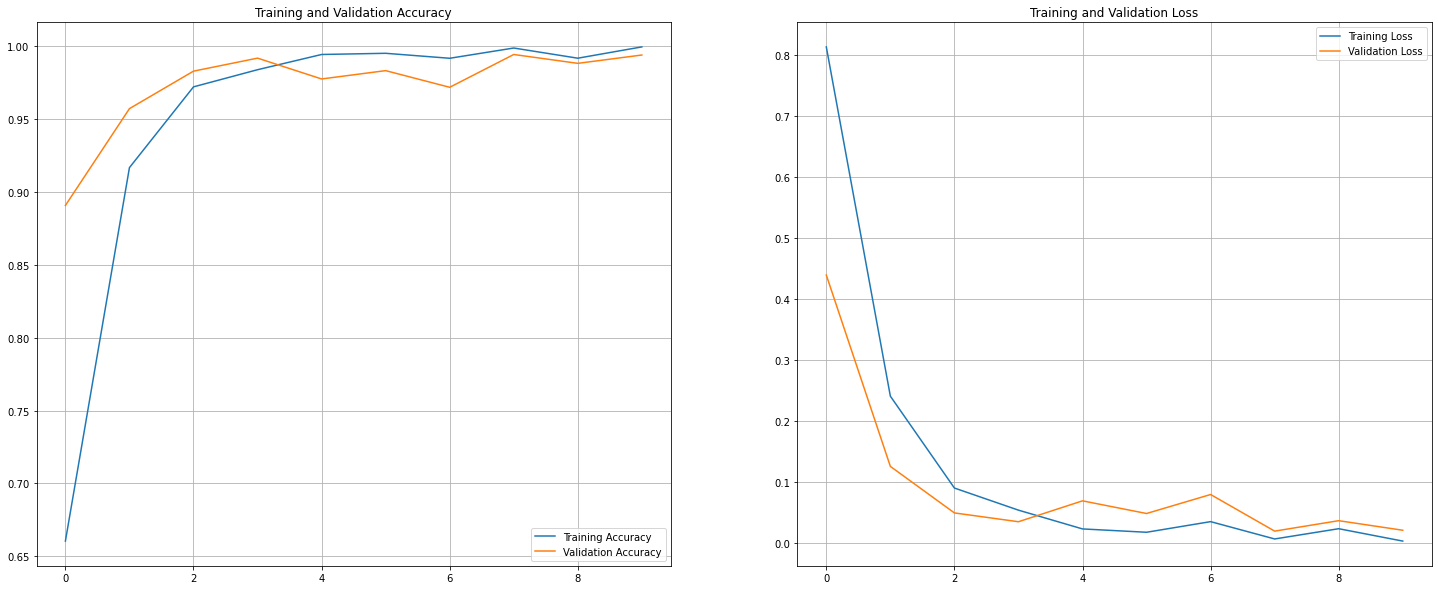

In [232]:
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

In [212]:
from sklearn.metrics import accuracy_score
predict_train = model_4.predict(train_generator) 
classes_train = np.argmax(predict_train, axis=1)
predict_val = model_4.predict(val_generator) 
classes_val = np.argmax(predict_val, axis=1)

y_train= train_generator.labels
y_val= val_generator.labels
print(f'Training: {accuracy_score(y_train, classes_train)}')
print(f'Vali: {accuracy_score(y_val, classes_val)}')

Training: 0.999796167957603
Vali: 0.9939285714285714


# Applay transfere learining using (MobileNet)

In [21]:
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [22]:


base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3)) 
 
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False
      
    model_6 = Sequential(
                        [InputLayer(input_shape=(150, 150, 3)),  
                         base_model,
                         Flatten(),
                         Dense(128, activation='relu'),   
                         Dense(32, activation='relu'), 
                         Dense(3, activation='softmax')]
                       )

model_6.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [23]:
model_6.summary()

Model: "sequential_153"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_153 (Flatten)       (None, 32000)             0         
                                                                 
 dense_459 (Dense)           (None, 128)               4096128   
                                                                 
 dense_460 (Dense)           (None, 32)                4128      
                                                                 
 dense_461 (Dense)           (None, 3)                 99        
                                                                 
Total params: 6,358,339
Trainable params: 4,100,355
Non-trainable params: 2,257,984
__________________________________

In [24]:
history_5 = model_6.fit(
  train_generator, 
  validation_data=val_generator,
  epochs=10
)  

Epoch 1/10
614/614 [==============================] - 226s 364ms/step - loss: 2.5505 - accuracy: 0.8227 - val_loss: 0.4902 - val_accuracy: 0.8271
Epoch 2/10
614/614 [==============================] - 232s 378ms/step - loss: 0.1081 - accuracy: 0.9700 - val_loss: 0.0812 - val_accuracy: 0.9779
Epoch 3/10
614/614 [==============================] - 234s 380ms/step - loss: 0.3867 - accuracy: 0.9437 - val_loss: 0.0890 - val_accuracy: 0.9732
Epoch 4/10
614/614 [==============================] - 231s 376ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.0282 - val_accuracy: 0.9907
Epoch 5/10
614/614 [==============================] - 230s 374ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0193 - val_accuracy: 0.9939
Epoch 6/10
614/614 [==============================] - 232s 378ms/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.0177 - val_accuracy: 0.9957
Epoch 7/10
614/614 [==============================] - 230s 374ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0155 -

In [25]:
model_6.save('mobilenet_model.h5')

C:\Users\afnan\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

# test the best model for final prediction 

### we will test MobileNetV2 and  CNN model(model_0) and VGG16:

1-MobileNetV2 

In [25]:
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3)) 
 
# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False
      
    model_6 = Sequential(
                        [InputLayer(input_shape=(150, 150, 3)),  
                         base_model,
                         Flatten(),
                         Dense(128, activation='relu'),   
                         Dense(32, activation='relu'), 
                         Dense(3, activation='softmax')]
                       )

model_6.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [26]:
model_6.summary()

Model: "sequential_307"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_307 (Flatten)       (None, 32000)             0         
                                                                 
 dense_921 (Dense)           (None, 128)               4096128   
                                                                 
 dense_922 (Dense)           (None, 32)                4128      
                                                                 
 dense_923 (Dense)           (None, 3)                 99        
                                                                 
Total params: 6,358,339
Trainable params: 4,100,355
Non-trainable params: 2,257,984
__________________________________

In [24]:
# mobileNET
history_6 = model_6.fit(
  TRAIN_genrator, 
  validation_data=test_generator,
  epochs=10
)  


Epoch 1/10
701/701 [==============================] - 272s 384ms/step - loss: 1.6909 - accuracy: 0.8065 - val_loss: 0.4643 - val_accuracy: 0.8454
Epoch 2/10
701/701 [==============================] - 263s 374ms/step - loss: 0.0710 - accuracy: 0.9784 - val_loss: 0.4733 - val_accuracy: 0.8821
Epoch 3/10
701/701 [==============================] - 263s 375ms/step - loss: 0.0360 - accuracy: 0.9898 - val_loss: 0.4920 - val_accuracy: 0.8737
Epoch 4/10
701/701 [==============================] - 264s 376ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.6107 - val_accuracy: 0.8883
Epoch 5/10
701/701 [==============================] - 264s 377ms/step - loss: 0.1318 - accuracy: 0.9813 - val_loss: 0.8352 - val_accuracy: 0.8554
Epoch 6/10
701/701 [==============================] - 264s 376ms/step - loss: 0.1582 - accuracy: 0.9672 - val_loss: 0.6600 - val_accuracy: 0.8979
Epoch 7/10
701/701 [==============================] - 264s 377ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.8724 -

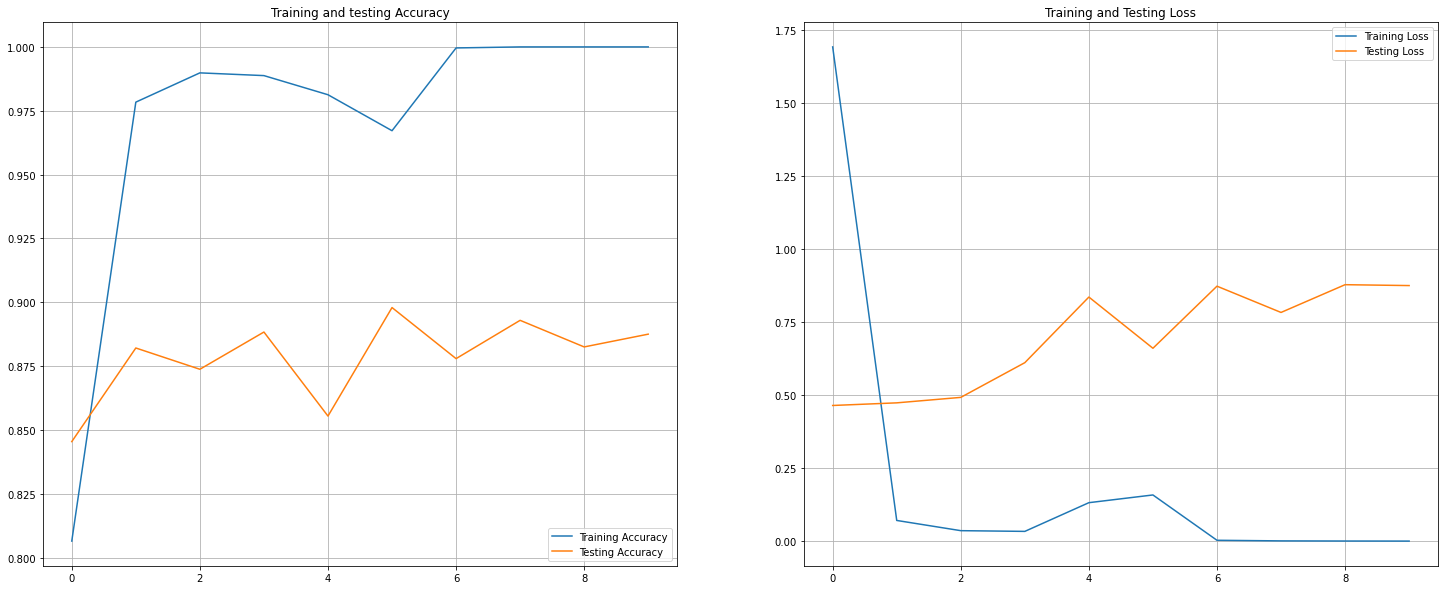

In [29]:
acc = history_6.history['accuracy']
val_acc = history_6.history['val_accuracy']

loss = history_6.history['loss']
val_loss = history_6.history['val_loss']
epochs=10

epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and testing Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss using MobileNetV2 ')
plt.grid(True)
plt.show()

2-NN(model_0)

In [33]:
## first model
history_7 = model_0.fit(
  TRAIN_genrator, 
  validation_data=test_generator,
  epochs=10
)   

Epoch 1/10
701/701 [==============================] - 279s 398ms/step - loss: 0.9057 - accuracy: 0.5062 - val_loss: 1.0152 - val_accuracy: 0.3408
Epoch 2/10
701/701 [==============================] - 278s 397ms/step - loss: 0.4217 - accuracy: 0.8255 - val_loss: 0.8851 - val_accuracy: 0.8358
Epoch 3/10
701/701 [==============================] - 296s 422ms/step - loss: 0.0713 - accuracy: 0.9810 - val_loss: 0.9794 - val_accuracy: 0.8608
Epoch 4/10
701/701 [==============================] - 302s 431ms/step - loss: 0.0289 - accuracy: 0.9923 - val_loss: 1.2591 - val_accuracy: 0.8704
Epoch 5/10
701/701 [==============================] - 278s 397ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 1.4623 - val_accuracy: 0.8679
Epoch 6/10
701/701 [==============================] - 291s 415ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 1.3934 - val_accuracy: 0.8675
Epoch 7/10
701/701 [==============================] - 278s 396ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 1.7565 -

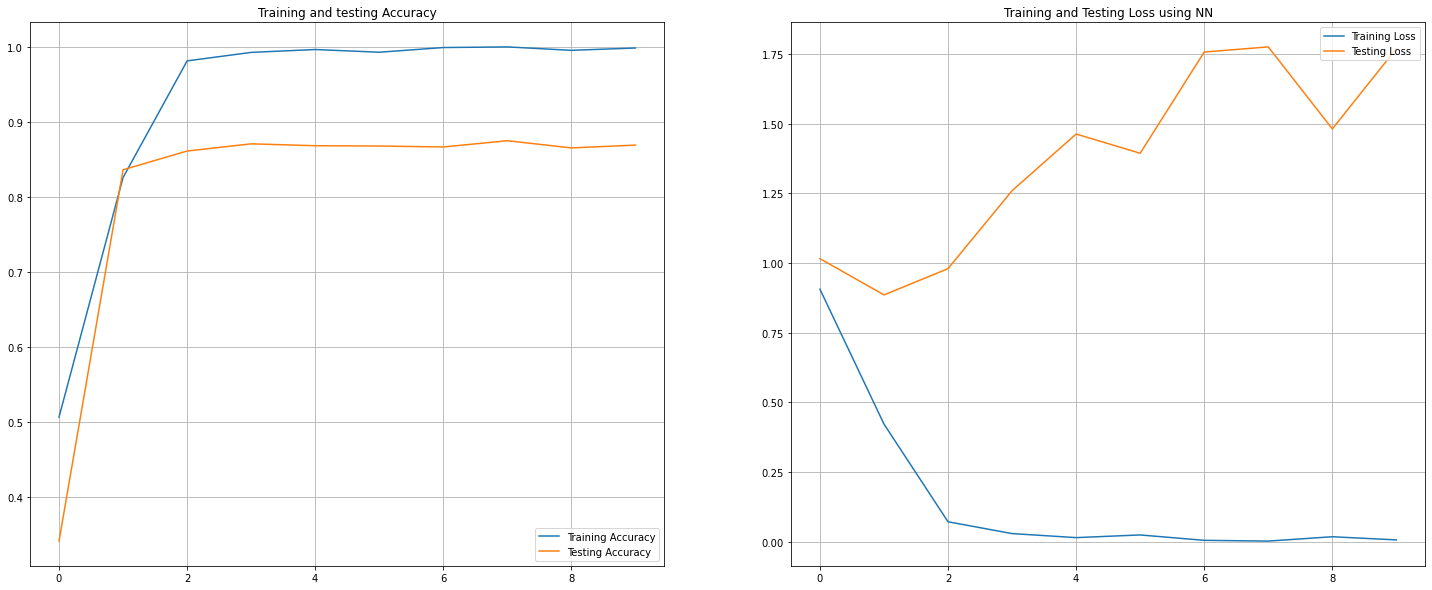

In [34]:
acc = history_7.history['accuracy']
val_acc = history_7.history['val_accuracy']

loss = history_7.history['loss']
val_loss = history_7.history['val_loss']
epochs=10

epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and testing Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss using NN')
plt.grid(True)
plt.show()

3-VGG16

In [35]:
##2 hidden layer , activation='relu'
from keras.applications.vgg16 import VGG16   
base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base.layers:
    layer.trainable = False  

model_5 = Sequential(
                        [InputLayer(input_shape=(150,150,3)),  
                         base,
                         Flatten(),
                         Dense(128, activation='relu'),   
                         Dense(32, activation='relu'), 
                         Dense(3, activation='softmax')]
                       )

model_5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [36]:
model_5.summary()

Model: "sequential_309"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_309 (Flatten)       (None, 8192)              0         
                                                                 
 dense_926 (Dense)           (None, 128)               1048704   
                                                                 
 dense_927 (Dense)           (None, 32)                4128      
                                                                 
 dense_928 (Dense)           (None, 3)                 99        
                                                                 
Total params: 15,767,619
Trainable params: 1,052,931
Non-trainable params: 14,714,688
_________________________________________________________________


In [37]:
history_8 = model_5.fit(
  TRAIN_genrator, 
  validation_data=test_generator,
  epochs=10
)  

Epoch 1/10
701/701 [==============================] - 1794s 3s/step - loss: 0.8082 - accuracy: 0.5943 - val_loss: 0.5230 - val_accuracy: 0.7796
Epoch 2/10
701/701 [==============================] - 3515s 5s/step - loss: 0.2078 - accuracy: 0.9252 - val_loss: 0.2746 - val_accuracy: 0.9108
Epoch 3/10
701/701 [==============================] - 1877s 3s/step - loss: 0.0827 - accuracy: 0.9742 - val_loss: 0.3422 - val_accuracy: 0.9067
Epoch 4/10
701/701 [==============================] - 1890s 3s/step - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.3071 - val_accuracy: 0.9250
Epoch 5/10
701/701 [==============================] - 1770s 3s/step - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.3192 - val_accuracy: 0.9304
Epoch 6/10
701/701 [==============================] - 1792s 3s/step - loss: 0.0441 - accuracy: 0.9847 - val_loss: 0.3158 - val_accuracy: 0.9175
Epoch 7/10
701/701 [==============================] - 1709s 2s/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.4206 - val_accuracy:

In [45]:
model_5.save('model_5_best.h5')

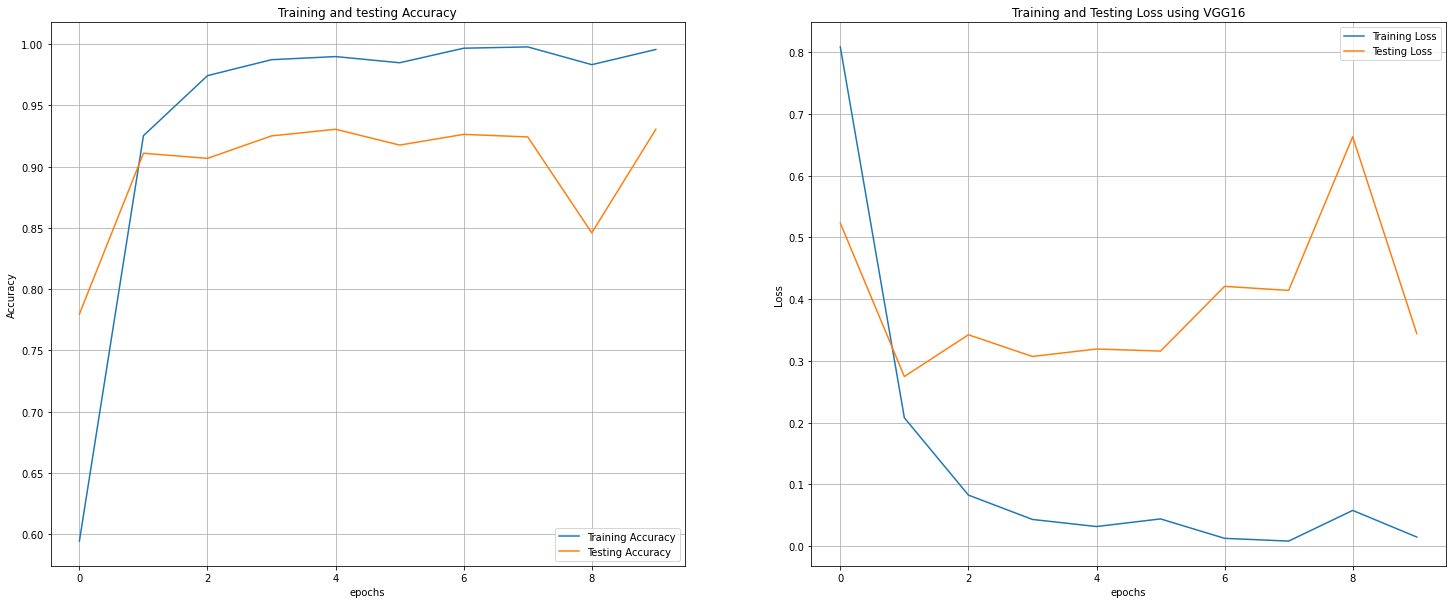

In [90]:
acc = history_8.history['accuracy']
val_acc = history_8.history['val_accuracy']

loss = history_8.history['loss']
val_loss = history_8.history['val_loss']
epochs=10




epochs_range = range(epochs)


plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') #, color = 'red')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')  # , color='blue')
plt.legend(loc='lower right')
plt.title('Training and testing Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss using VGG16')
plt.xlabel('epochs')
plt.ylabel('Loss');
plt.grid(True)
plt.show()

In [46]:
best_model=model_5

## best Model is VGG16 

# final Scores and Confusion Matrix:

In [60]:
predict_train = model_5.predict(TRAIN_genrator)
classes_train = np.argmax(predict_train, axis=1)

predict_test = model_5.predict(test_generator) 
classes_test = np.argmax(predict_test, axis=1)
y_train= TRAIN_genrator.labels
y_test= test_generator.labels

In [59]:
test_generator.labels

array([0, 0, 0, ..., 2, 2, 2])

In [58]:
TRAIN_genrator.labels

array([0, 0, 0, ..., 2, 2, 2])

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, classes_train)
print('Train Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, classes_train, average="macro")
print('Train_Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, classes_train, average="macro")
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, classes_train, average="macro")
print('F1 score: %f' % f1)


test_accuracy = accuracy_score(y_test, classes_test)
print('Test Accuracy: %f' % test_accuracy)
test_precision = precision_score(y_test, classes_test, average="macro")
print('Test Precision: %f' % test_precision)
# recall: tp / (tp + fn)
test_recall = recall_score(y_test, classes_test, average="macro")
print('Test Recall: %f' % test_recall)
# f1: 2 tp / (2 tp + fp + fn)
test_f1 = f1_score(y_test, classes_test, average="macro")
print('Test F1 score: %f' % test_f1)


Train Accuracy: 0.998618
Train_Precision: 0.995899
Recall: 0.998999
F1 score: 0.997436
Test Accuracy: 0.930417
Test Precision: 0.933343
Test Recall: 0.929644
Test F1 score: 0.930894


In [63]:
from sklearn.metrics import confusion_matrix

In [67]:
print(confusion_matrix(test_generator.labels, classes_test))

[[818  24  14]
 [ 52 737  19]
 [ 46  12 678]]


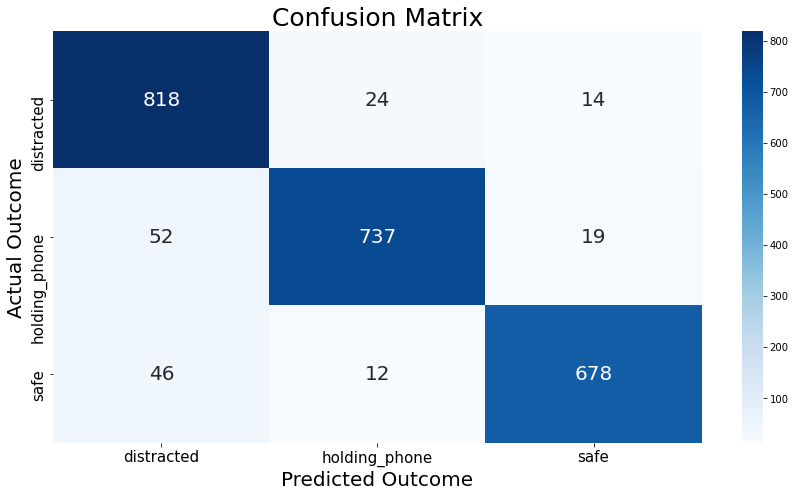

In [69]:
plt.figure(figsize=(35,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, classes_test),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues")



plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['distracted', 'holding_phone', 'safe']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();